In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,recall_score

In [2]:
#TASK1 DATA EXPLORATION IMPORT LIBRARIES AND MEDICAL DATASET
df=pd.read_csv(r'Downloads/DS1_C9_S5_Practice_Diabetes_Data.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
#OBSERVE THE STRUCTURE OF THE DATASET
df.shape
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [4]:
df1=df.drop(columns=['Outcome'])
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


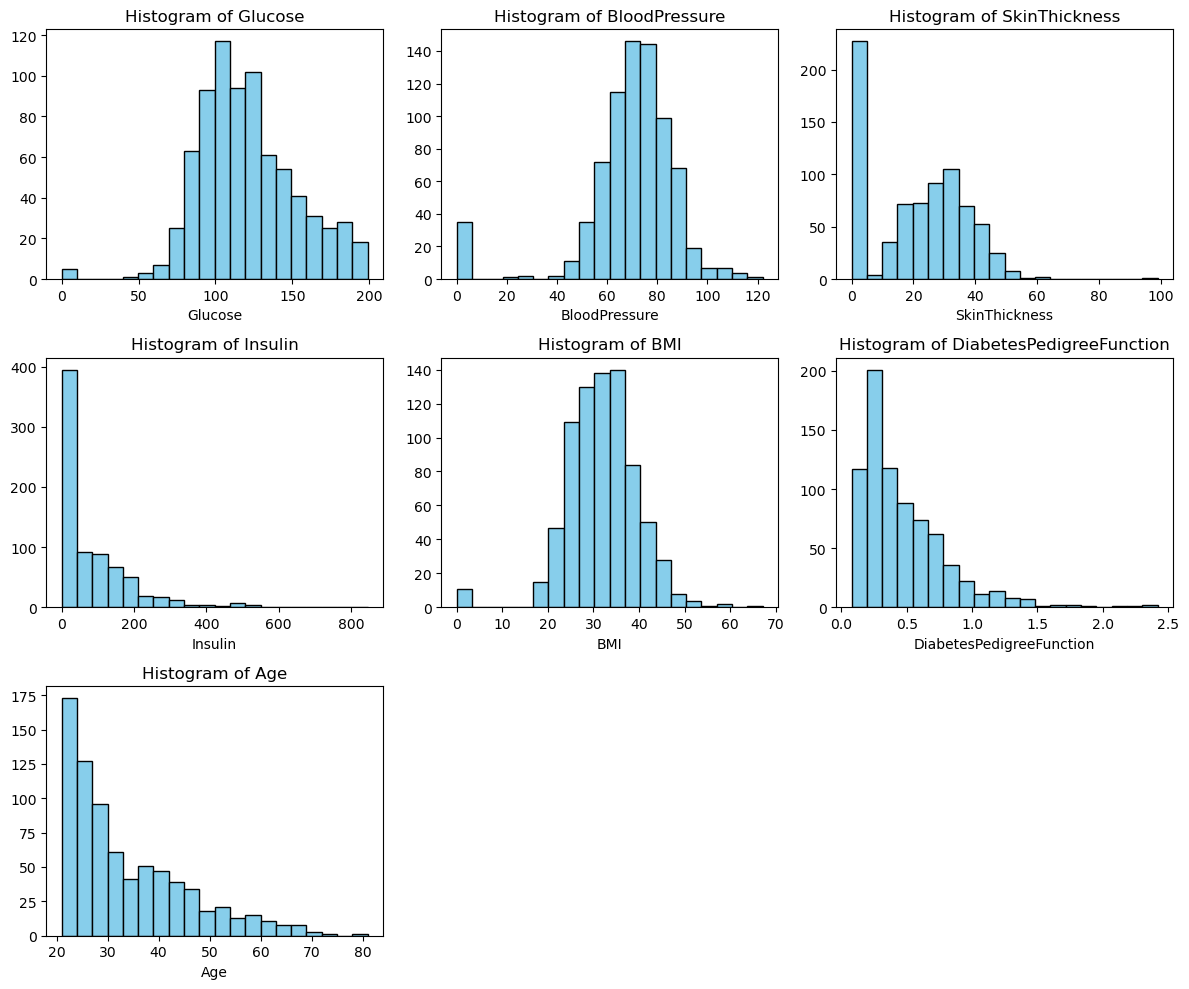

In [7]:
#creating histgram for independent variables.
import matplotlib.pyplot as plt
df1 = df.drop(columns=['Outcome'])  # Exclude the 'Outcome' column

plt.figure(figsize=(12, 10))
for i, column in enumerate(df1.columns):
    plt.subplot(3, 3,i+1)  # Create subplots
    plt.hist(df1[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')  # Title for each plot
    plt.xlabel(column)  #
    

plt.tight_layout()  
plt.show()


In [ ]:
#TASK2:DATA PREPARATION :

In [14]:
#A)PREPROCESS THE DATA THROUGH SCALING USING STANDARD SCALER
X = df.drop('Outcome', axis=1)
y = df['Outcome']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...
763,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [15]:
#B)SPLIT THE DATA INTO TRAINING AND TESTING DATASETS WITH 20% TEST DATA'
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)
X_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
93,134,72,0,0,23.8,0.277,60
657,120,80,48,200,38.9,1.162,41
160,151,90,38,0,29.7,0.294,36
74,79,75,30,0,32.0,0.396,22
544,88,78,29,76,32.0,0.365,29
...,...,...,...,...,...,...,...
538,127,80,37,210,36.3,0.804,23
319,194,78,0,0,23.5,0.129,59
634,92,62,0,0,25.9,0.167,31
368,81,86,16,66,27.5,0.306,22


In [ ]:
#TASK3:MODEL BUILDING

In [16]:
#FIND  OPTIUM K VALUE
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [17]:
# Build and train the final model with optimal K
from sklearn.model_selection import cross_val_score
k_values = range(1, 20)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 8


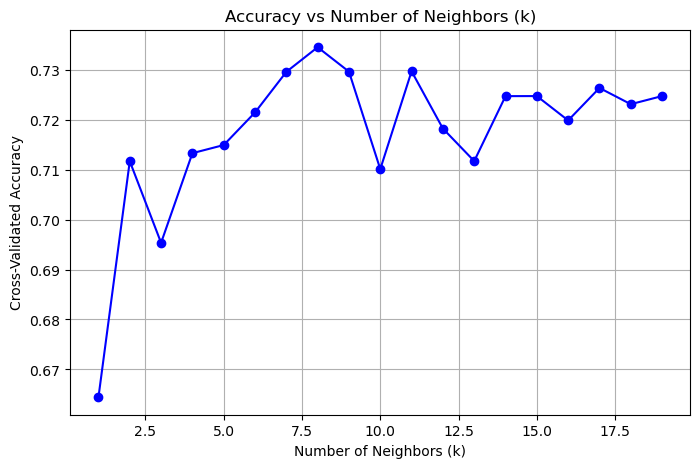

In [19]:
import matplotlib.pyplot as plt

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()

In [ ]:
#Task 4: Evaluate Model Performance

#Predict whether the person is diabetic or not based on the test data

#Evaluate performance of the model using evaluation metrics.

#Write the final interpretation based on the evaluation scores of the model.

In [20]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
pred=KNN.predict(X_test)

In [22]:
accuracy_score(pred,y_test)

0.7337662337662337

In [23]:
confusion_matrix(pred,y_test)

array([[83, 24],
       [17, 30]], dtype=int64)

In [24]:
f1_score(pred,y_test)

0.594059405940594

In [25]:
precision_score(pred,y_test)

0.5555555555555556

In [28]:
recall_score(pred,y_test)

0.6382978723404256

In [29]:
print("Recall Score:", recall_score(pred,y_test))
print("F1 Score:", f1_score(pred,y_test))
print("Precision Score:", precision_score(pred,y_test))
print("Accuracy Score:", accuracy_score(pred,y_test))

Recall Score: 0.6382978723404256
F1 Score: 0.594059405940594
Precision Score: 0.5555555555555556
Accuracy Score: 0.7337662337662337


In [30]:
#Recall (0.63): The model identifies 63% of actual diabetic cases—needs improvement to avoid missing positive cases.
#Precision (0.55): Only 55% of predicted diabetic cases are correct—many false positives.
#F1 Score (0.59): Balance between precision and recall is weak
#Accuracy (0.73):Accuracy is Moderate overall performance but insufficient for medical tasks due to possible class imbalance.